In [1]:
import torch
import os
import skimage
from PIL import Image
from torchvision.transforms import Resize, Compose, ToTensor, Normalize
from pathlib import Path
from torch.utils.data import DataLoader, Dataset
from training.wandblogger import WandBLogger2D
from training.trainer import MRTrainer
from datasets.imagesignal import ImageSignal
from networks.mrnet import MRFactory
from datasets.sampling import make2Dcoords
import yaml
from yaml.loader import SafeLoader
import matplotlib.pyplot as plt

In [2]:
os.environ["WANDB_NOTEBOOK_NAME"] = "eval-net.ipynb"
BASE_DIR = Path('.').absolute().parents[0]
IMAGE_PATH = BASE_DIR.joinpath('img')
MODEL_PATH = BASE_DIR.joinpath('models')

In [3]:
project_name = "test_eval"
# hyperparameters
with open('../configs/config_base_m_net.yml') as f:
    hyper = yaml.load(f, Loader=SafeLoader)
    #print(hyper)


In [4]:
mrmodel = MRFactory.load_state_dict(
    os.path.join(MODEL_PATH,'MPlena__2-2_w128F_hf256_MEp150_hl1_128px.pth'))

In [5]:
print("Model: ", type(mrmodel))

Model:  <class 'networks.mrnet.MNet'>


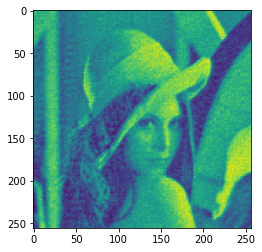

In [6]:
output = mrmodel(make2Dcoords(256,256))
# print("Out ", output)
model_out = torch.clamp(output['model_out'], 0.0, 1.0)
# print("IMG", model_out)

plt.imshow(model_out.cpu().view(256,256).detach().numpy())
